# Apply $\pi^+/\pi^-$ acceptance matching cut in $p-\theta$ plane 

last edit Mar-10, 2022

## Imports and definitions

In [117]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
r2d = 180./np.pi

In [118]:
main_data_path     = '/Users/erezcohen/Desktop/data/BAND/'
e_e_pi_data_path   = main_data_path + 'SIDIS_skimming/'
e_e_pi_n_data_path = main_data_path + 'merged_SIDIS_and_BAND_skimming/'

In [119]:
pi_charge_names  = ['piplus'   ,'piminus'  ]
pi_labels        = ['\pi^{+}'  ,'\pi^{-}'  ]
pi_colors        = ['royalblue','black'   ]

## Auxiliary functions

# load data from 101 runs of 10.2 GeV

In [123]:
runs_filename = "/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/macros/runlists/good_runs_10-2.txt"
Nruns = 1

In [124]:
# Using readlines()
runs_file     = open(runs_filename, 'r')
run_fileLines = runs_file.readlines()
runs = []
for line in run_fileLines[0:Nruns]:#{
    run = int(line.strip())
    runs.append(run)
runs = np.array(runs)
runs

array([6420])

In [156]:
fdebug   = 2
e_e_pi   = dict()
for runnum,runIdx in zip(runs,range(len(runs))):
    for pi_charge_name in pi_charge_names:
        eepi   = pd.read_csv(e_e_pi_data_path 
                                           +'skimmed_SIDIS_inc_00%d_e_%s_selected_eepi_kinematics.csv'%(runnum,pi_charge_name))
        if fdebug>1: print('loaded',len(eepi),'(e,e',pi_charge_name,') events ')    
            
        if runIdx==0:             
            e_e_pi[pi_charge_name]   = eepi
        else:
            e_e_pi[pi_charge_name]   = pd.concat([e_e_pi[pi_charge_name],  eepi ])
    print('loaded file %d/%d files'%(runIdx,len(runs)))
    
print('done.')

loaded 644241 (e,e piplus ) events 
loaded 274002 (e,e piminus ) events 
loaded file 0/1 files
done.


# Implement and check acceptance-matching cut

## Plot $p$ vs. $\theta$ for different sectors

In [203]:
bins = (np.linspace(1,5,100),np.linspace(0,40,100))
xticks = np.linspace(1,5,5)
yticks = np.linspace(0,40,5)

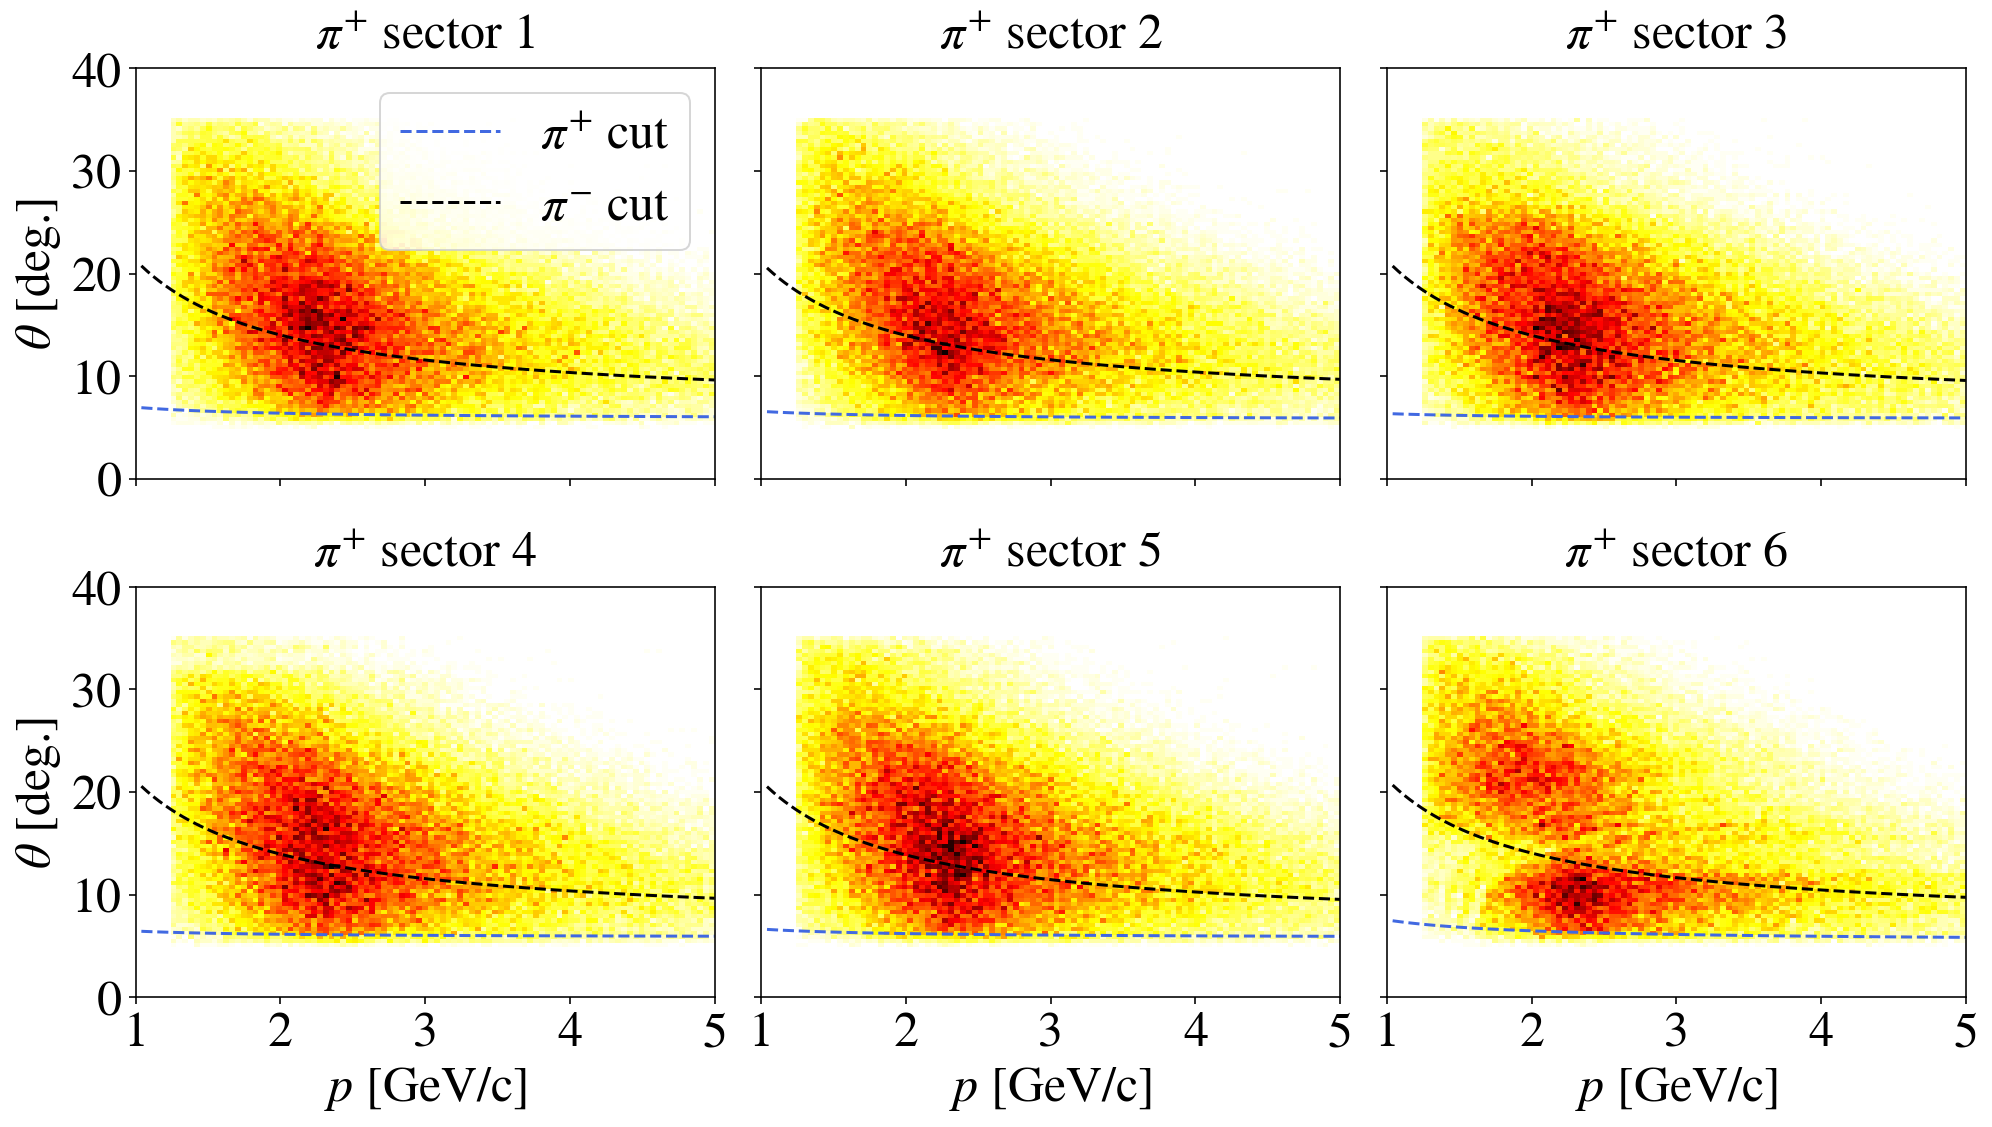

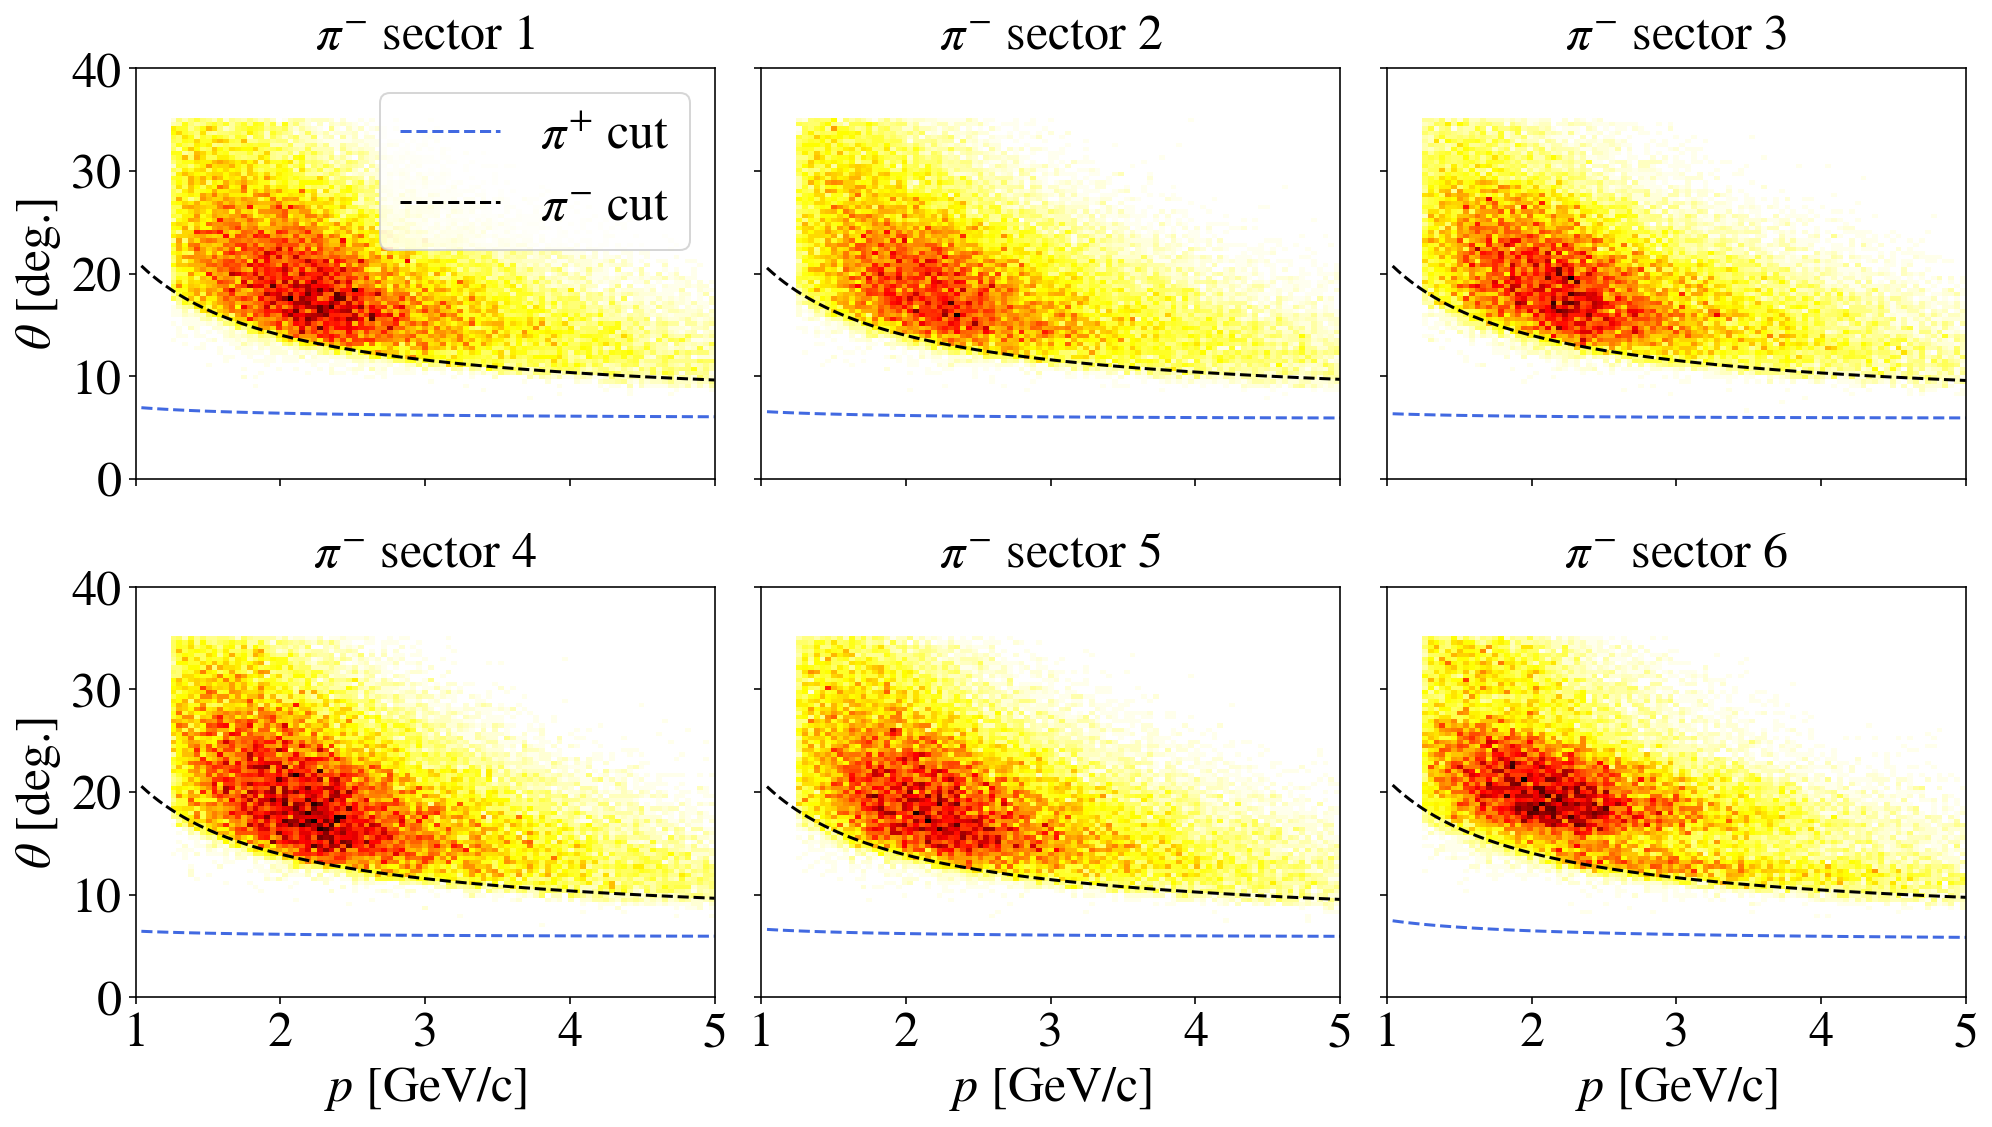

In [204]:
for pi_charge_name,pi_label,pi_color in zip(pi_charge_names,pi_labels,pi_colors):#{
    df = e_e_pi[pi_charge_name]



    fig = plt.figure(figsize=(14,8))
    for sector in range(1,7):
        ax = fig.add_subplot(2,3,sector)
        df_sector = df[df.pi_DC_sector == sector]

        plt.hist2d( df_sector.pi_P, df_sector.pi_Theta*r2d, cmap='hot_r',bins=bins, label='data');

        p = bins[0][1:]
        for pi_cut_charge_name,pi_cut_label,pi_cut_color in zip(pi_charge_names,pi_labels,pi_colors):
            min_theta = pi_min_theta_cut( pi_cut_charge_name, sector, p )
            plt.plot(p, min_theta, '--', label='$'+pi_cut_label+'$ cut', color=pi_cut_color)

        set_axes(ax,'$p$ [GeV/c]' if sector>3 else '',
                 '$\\theta$ [deg.]' if sector%3==1 else '',
                 remove_ticks_x = False if sector>3 else True,
                 remove_ticks_y = False if sector%3==1 else True,
                 title='$'+pi_label+'$ sector %d'%sector,xticks=xticks, yticks=yticks, 
                 do_add_legend=True if sector==1 else False)
    plt.tight_layout()                   

#}

## Apply $p$ vs. $\theta$ for different sectors

In [205]:
e_e_pi_after_cut = apply_p_theta_acceptance_cut(df_dict=e_e_pi)
print('done applying p-theta cut')
#e_e_pi

done applying p-theta cut


## Plot $\phi$ distribution for the events that passed the cut

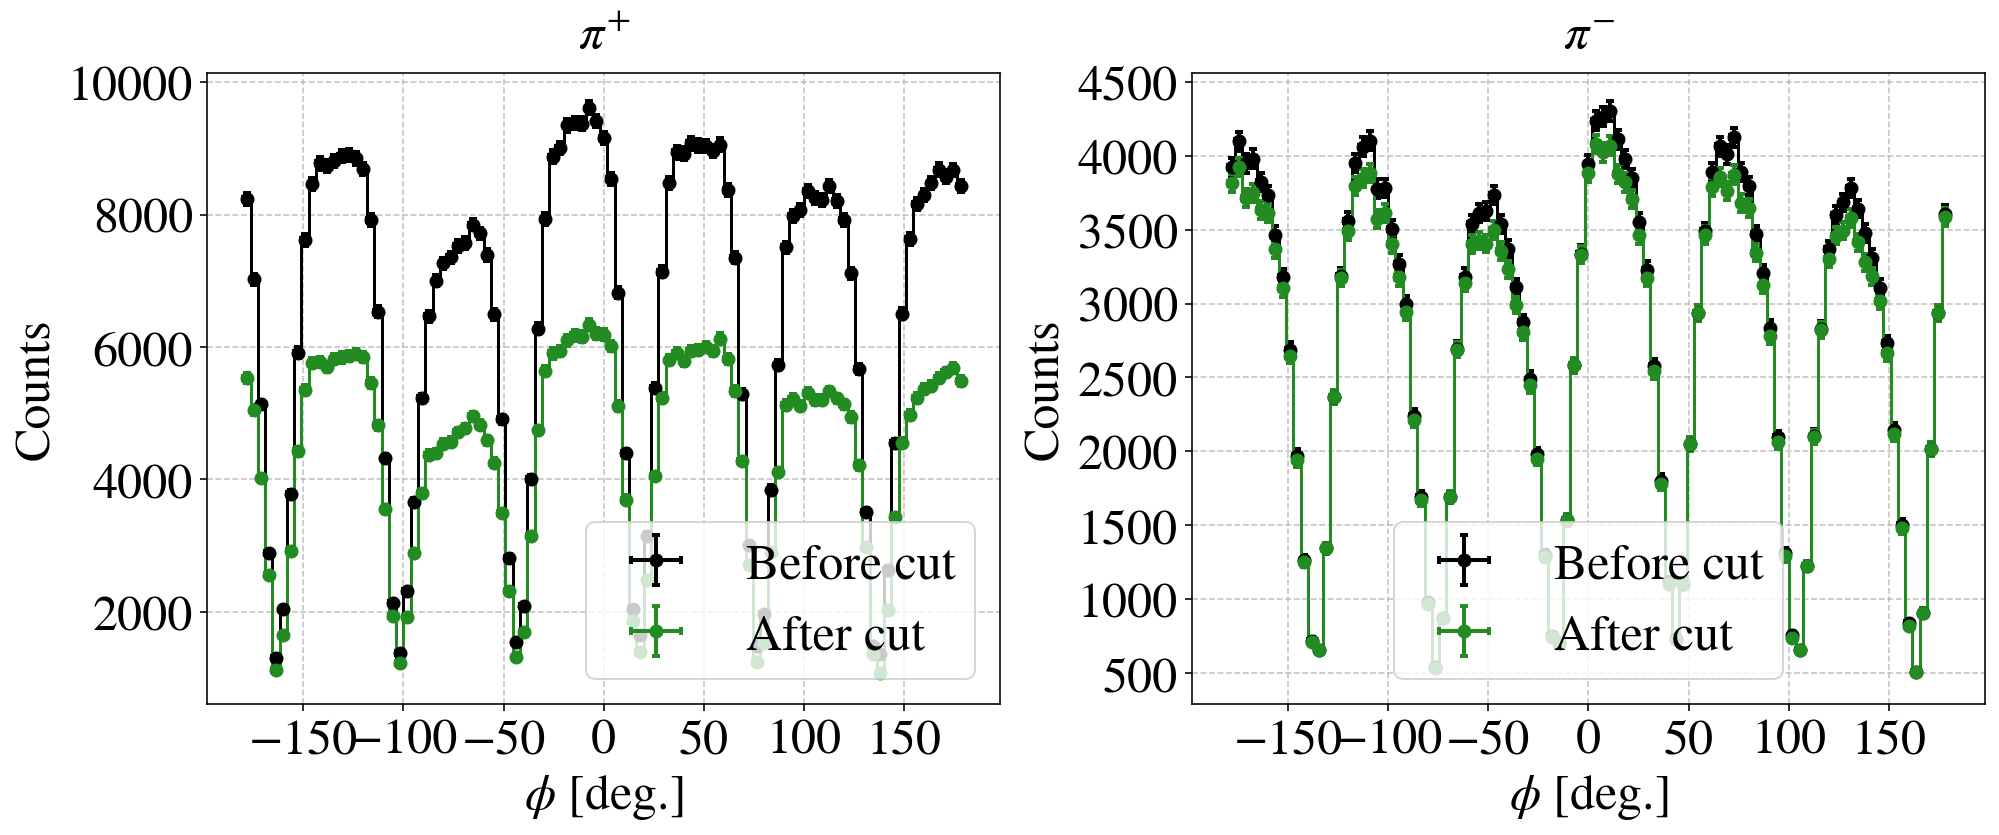

In [206]:
bins=np.linspace(-180,180,100)

fig = plt.figure(figsize=(14,6));

for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)
    
    plot_step_hist( x_arr=np.array(e_e_pi[pi_charge_name].pi_Phi)*r2d, 
                   bins=bins , label='Before cut', color='black' )

    plot_step_hist( x_arr=np.array(e_e_pi_after_cut[pi_charge_name].pi_Phi)*r2d, 
                   bins=bins , label='After cut', color='forestgreen' )

    set_axes(ax, '$\phi$ [deg.]', 'Counts', title='$'+pi_label+'$', do_add_grid=True,do_add_legend=True)
    
plt.tight_layout()

### Check that cut works

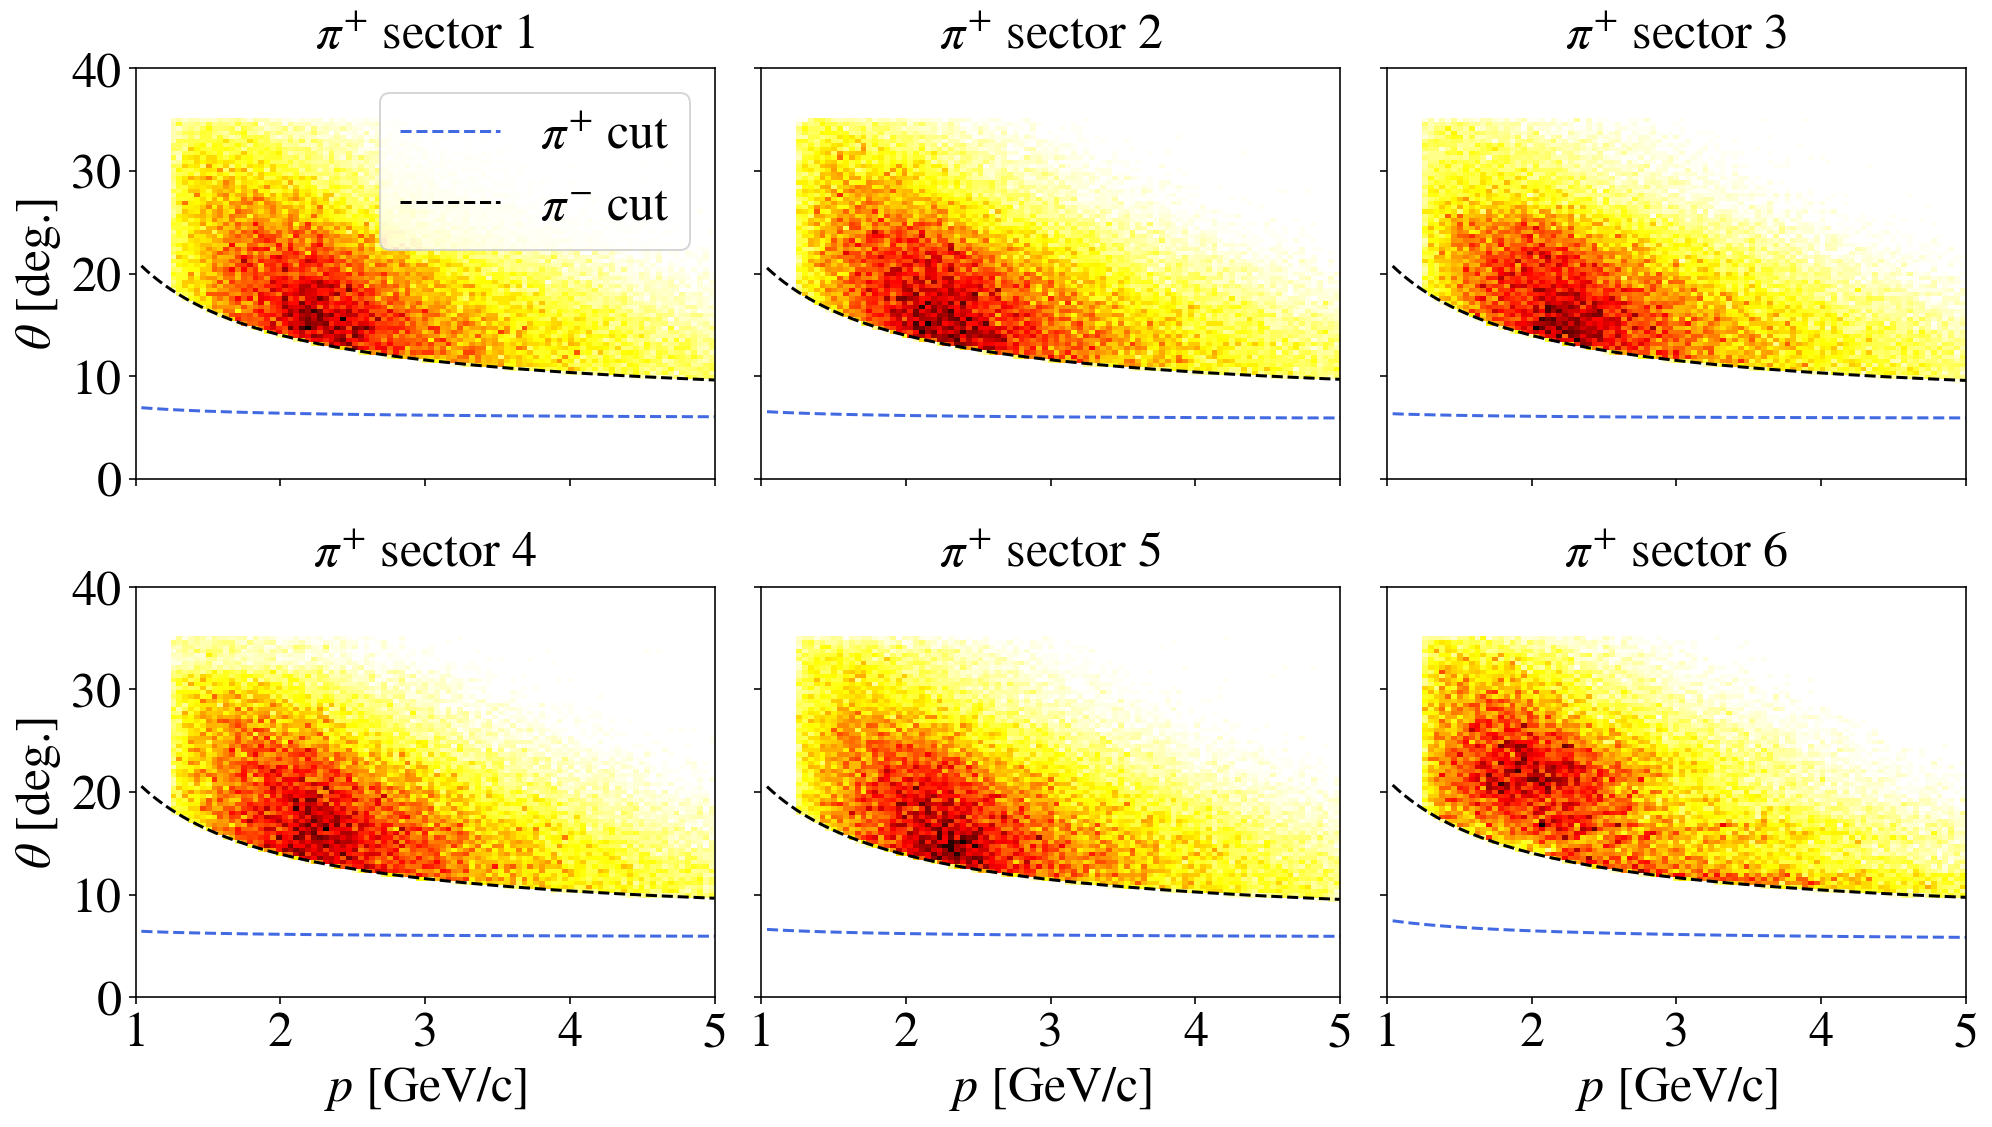

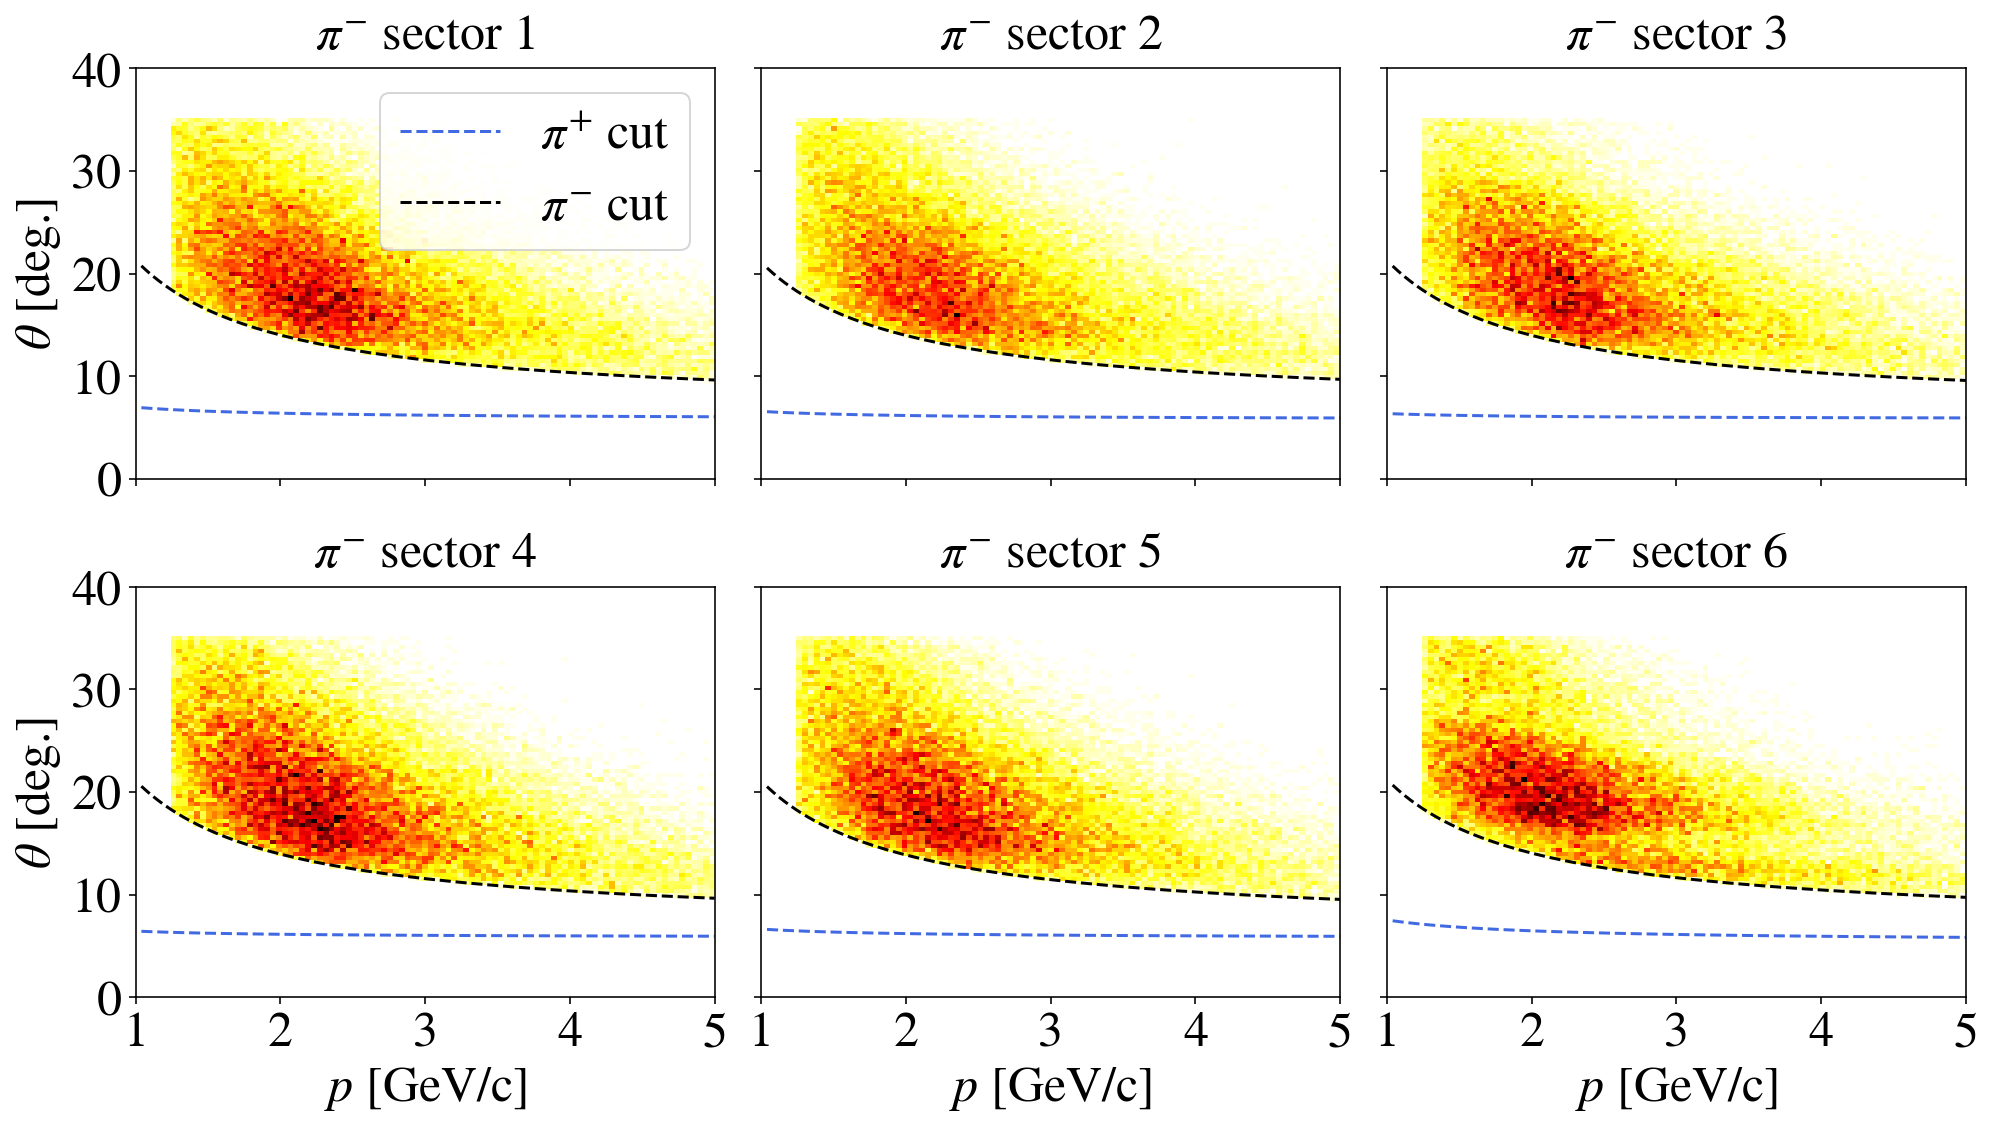

In [207]:
bins = (np.linspace(1,5,100),np.linspace(0,40,100))
xticks = np.linspace(1,5,5)
yticks = np.linspace(0,40,5)
for pi_charge_name,pi_label,pi_color in zip(pi_charge_names,pi_labels,pi_colors):#{
    df = e_e_pi_after_cut[pi_charge_name]



    fig = plt.figure(figsize=(14,8))
    for sector in range(1,7):
        ax = fig.add_subplot(2,3,sector)
        df_sector = df[df.pi_DC_sector == sector]

        plt.hist2d( df_sector.pi_P, df_sector.pi_Theta*r2d, cmap='hot_r',bins=bins, label='data');

        p = bins[0][1:]
        for pi_cut_charge_name,pi_cut_label,pi_cut_color in zip(pi_charge_names,pi_labels,pi_colors):
            min_theta = pi_min_theta_cut( pi_cut_charge_name, sector, p )
            plt.plot(p, min_theta, '--', label='$'+pi_cut_label+'$ cut', color=pi_cut_color)

        set_axes(ax,'$p$ [GeV/c]' if sector>3 else '',
                 '$\\theta$ [deg.]' if sector%3==1 else '',
                 remove_ticks_x = False if sector>3 else True,
                 remove_ticks_y = False if sector%3==1 else True,
                 title='$'+pi_label+'$ sector %d'%sector,xticks=xticks, yticks=yticks, 
                 do_add_legend=True if sector==1 else False)
    plt.tight_layout()                   

#}

In [ ]:
plot_step_hist(x_arr=